# Gender analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
import pandas as pd
  
# reading csv file
df = pd.read_csv("names.csv")

In [3]:
df

,01_prenom,02_genre,03_langage,04_fréquence,trans
0,aaliyah,f,english (modern),0.0,عاليه
1,aapeli,m,finnish,0.0,Aapeli
2,aapo,m,finnish,0.0,AAPO
3,aaren,"m,f",english,0.0,آرين
4,aarne,m,finnish,0.0,هارن
...,...,...,...,...,...
11622,zvi,m,jewish,0.1,زفي
11623,zvonimir,m,croatian,0.0,Zvonimir
11624,zvonimira,f,croatian,0.0,Zvonimira
11625,zvonko,m,croatian,0.0,Zvonko


In [19]:
 
# filtering the rows where Credit-Rating is Fair
df = df[df['caption'].str.contains(' مفسر ')]
print(df)

Empty DataFrame
Columns: [caption, link]
Index: []


In [4]:
df.to_csv('names.csv', encoding='utf-8-sig')

# Domain knowledge

In [466]:
# stopwords 
stopwords = set(["في" , "الى" , "من" , "على" , "او" , "متى" , "حين" , "كان" , "يكون" , "سوف" , "-" , 
                 "الى" , "مع"  , "هذا" , "هذه" , "قبل" , "بعد" , "أن" , 
                "السنة" , "اليوم"  "بالقرب" ,"فوق" , "بضع" , "عبر" , "بجانب" , 
                "خلال" ,  "." , "اثناء" , "اللتي" , "الاول" , "عن" , "التي" , "،" , "ما" , "," , "حفل" , "أو", "لا" , 
                "الي" , "." , "أثناء" , "قد" , "قد" , "#" , "ﺇلى" , "الذي" , "تم" , "غير" ,  
                "تحت" ,"كل" , "عند"  , "," 
                ])

In [467]:
# #Arabic translated fromm Prenom & genre de data.gouv.fr 
# url0 = "arab.csv"
# names = pd.read_csv(url0, encoding = "utf-8-sig", sep=",", usecols=["gender", "translated_name"], index_col="translated_name")
# names = names.to_dict()['gender'] # mapping from name to gender, ex: Anne -> 'f' (or 'm', 'm,f')

In [468]:
# women jobs 
names={}

for w in ["لاعبة", "مهندسة" , "ربة منزل" , "مدرسة" , "عالمة" , "ممرضة" , "مضيفة" , "ممثلة" , 
          "أستاذة" , "دكتورة" ,"محامية" , "أميرة" , "ملكة"  ,"فتاة" , "سيدة اعمال" , "فنانة" , "رسامة", "مغنية" , 
          "امرأة", "بنت", "ابنة", "طفلة", "ام", "جدة", "عمة", "سيدة"
          "مصممة" , "جراحة" ,"بطلة" , "مديرة" , "عاملة" , "خياطة" ,"رئيسة" , "نائبة" , "محاسبة" , "محللة", "مطورة" , 
          "طبيبة" , "مذيعة" ,"اعلامية" , "مشهورة" , "مستشارة" , "اخصائية" ,"صحفية" , "مترجمة" , "كاتبة" , "روائية", "ملحنة" , 
          "مخرجة" , "منتجة" ,"ناشطة" , "متحدثة" ,
]:
    names[w] = "f"

In [469]:
# #  men jobs 
for w in ["لاعب", "مبرمج", "مهندس" , "طيار" , "مدرس" , "عالم" ,
          "ممثل" , "مضيف" , "رجل اطفاء" ,"رجل اعمال" , "امير" , "محامي" ,"الممثل" , 
          "مغني" , "فنان" , "رسام" , "أستاذ" , "دكتور"  , "الملك" , 
          "رجل","طفل", "فتى", "صبي", "ابن", "اب", "جد", "عم", "سيد",
          "مصمم" , "جراح" ,"بطل" , "مدير" , "عامل" , "خياط" ,"رئيس" , "نائب" , "محاسب" , "محلل", "مطور" , 
          "طبيب" , "مذيع" ,"اعلامي" , "مشهور" , "مستشار" , "اخصائي" ,"صحفي" , "مترجم" , "كاتب" , "روائي", "ملحن" , 
          "مخرج" , "منتج" ,"ناشط" , "متحدث" ,
          ]:
    names[w] = "m"

# 1. Prepare dataset

In [470]:
def load_dataset(url: str):
    """
    Args:
        url: str, a link pointing a csv file
    Returns:
        df: pd.DataFrame, a table containing street names as rows (along with lat, long)
    """
    
    # read dataset
    df = pd.read_csv(url, sep=",")
    
    # keep relevant columns
    df = df[['caption']]
    
    # reset index
    df = df.reset_index()
    return df

# 2. Label names

In [471]:
def label_street(name: str):
    """
    Args:
        name: str, street name
    Returns:
        label: int, 0 (no gender), 1 (M), 2 (F), 1.5 (uncertain or mixed H/F)
    """
    
    # preprocess string (lower case, remove digits and punctuation)
    name = name.lower()
    for d in "0123456789-'":
        name = name.replace(d, ' ')
    
    # iterate over each street words and return 1 (resp 2) if M (resp F) pattern for first name (prenom A)
    for w in name.split():
        w = w.strip() # remove extra white spaces
        if w not in stopwords and w in names:
            gender = names[w]
            if gender == 'f':
                return 2
            elif gender == 'm':
                return 1        
    return 0 # no label

In [472]:
# Test names
url = "mydata.csv"
df = load_dataset(url)
df["label"] = df['caption'].apply(label_street)
df

,index,caption,label
0,0,خارطة للدول المختارة (لون برتقالي) والجيدة (لو...,0
1,1,خريطة لقارة بانجيا العظمى قبل نحو 250 مليون سن...,0
2,2,الفرش الصخرية، إحدى أقدم أشكال الحياة الباقية ...,0
3,3,اصطدام الكويكب الذي يعتقد أنه سبب انقراض العصر...,0
4,4,دورة حياة الشمس.,0
...,...,...,...
237002,237002,جزء من منتوجات بوڤا,0
237003,237003,X-45A، طائرة دون طيار,1
237004,237004,صورة جنكيز خان في متحف القصر الوطني في تايبيه،...,0
237005,237005,كوكبة العقرب كما تخيلها القدماء.,0


In [473]:
df1=df[df["label"]==2.0]

In [474]:
df1

,index,caption,label
92,92,لوحة نزول ملكة سبأ، تظهر فيها بلقيس، أشهر ملكا...,2
301,301,المكتبة الظاهرية في المدينة، وقد بناها الظاهر ...,2
329,329,إليزابيث بلاكويل، أول طبيبة تحصل على شهادة الط...,2
417,417,كليوباترا السابعة أخر ملكة من الأسرة المقدونية.,2
482,482,مدرسة فرعونية قديمة.,2
...,...,...,...
236775,236775,مدرسة ييتس الثانوية (حرم 1958 الحالي في الصورة...,2
236780,236780,تحولت إميلي رويتي ابنة سعيد بن سلطان إلى المسي...,2
236813,236813,عربات ال أس-300 بي ام يو-2.,2
236851,236851,مبنى نادي زويف، موسكو (1926) لغولوسوف، أحد أهم...,2


# 3. Analysis

## 3.1 Names distribution

In [475]:
def get_sorted_vocab(corpus):
    """
    Args:
        corpus: list of str
    Returns:
        vocab: list of str, words in corpus
        counts: list of int, word counts
    """
    
    # save word counts as a dictionnary
    counts_dict = {}
    for name in corpus:
        for w in name.split():
            w = w.lower().strip()
            if w not in stopwords and len(w)>0:
                if w in counts_dict:
                    counts_dict[w] +=1
                else:
                    counts_dict[w] =1
                    
    # sort vocabulary by counts
    names = np.array(list(counts_dict.keys()))
    counts = np.array(list(counts_dict.values()))
    sorted_idx = np.argsort(counts)[::-1]
    return names[sorted_idx], counts[sorted_idx], counts_dict

In [476]:
# get vocabulary and word counts
corpus = df['caption'].values 
vocab, counts, counts_dict = get_sorted_vocab(corpus)
print('{} words found'.format(len(counts)))
print(' {} words occur 2+ times (total counts {})'.format(len([c for c in counts if c>1]), sum([c for c in counts if c>1])))
print(" احمد in vocab:", "احمد" in vocab) # test if name in vocab

301519 words found
 124287 words occur 2+ times (total counts 1794127)
 احمد in vocab: True


In [477]:
print(" احمد in vocab:", "احمد" in vocab) # test if name in vocab

 احمد in vocab: True


### 3.1.1 Women vs Men names in the top 50 and top 100

In [478]:
def print_stats_topk(k: int = 100):
    sorted_labels = [label_street(w) for w in vocab if label_street(w) in [1.0, 2.0]]
    topk_m = len([l for l in sorted_labels[:k] if l == 1.0])
    topk_f = len([l for l in sorted_labels[:k] if l == 2.0])
    ratio_topk = 100*topk_f/(topk_m+topk_f)
    print("Top{} names 'F' = {} vs. 'M' = {} ({:.1f}% representativeness)".format(k, topk_f, topk_m, ratio_topk))

In [479]:
print_stats_topk(k=50)
print_stats_topk(k=100)
print_stats_topk(k=237006)

Top50 names 'F' = 18 vs. 'M' = 32 (36.0% representativeness)
Top100 names 'F' = 45 vs. 'M' = 55 (45.0% representativeness)
Top237006 names 'F' = 53 vs. 'M' = 59 (47.3% representativeness)


Top50 names 'F' = 21 vs. 'M' = 29 (42.0% representativeness)
Top100 names 'F' = 35 vs. 'M' = 65 (35.0% representativeness)



### 3.1.2 Word distribution and gender bias

In [480]:
# import arabic_reshaper
# from bidi.algorithm import get_display
# x = [ ]

# for item in vocab:
#     x.append(get_display(arabic_reshaper.reshape(item)))

In [481]:
# plot power law, long tail distribution and bias (color blue M, red W, gray No Label)

def plot_word_distr(offset: int = 0, limit: int = 30):
    plt.figure(1, figsize=(15,5))
    color = {0: "gray", 1: "blue", 2: "red"}
    colors = [color[label_street(w)] for w in x[offset:offset+limit]]
    plt.scatter(np.arange(limit), counts[offset:offset+limit], c=colors)
    plt.plot(counts[offset:offset+limit], color="gray", linestyle='dashed')
    plt.xticks(np.arange(limit), x[offset:offset+limit], rotation=45)
    for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), colors):
        ticklabel.set_color(tickcolor)
    plt.ylabel("counts")
    plt.title("Common Gender-related words sorted by counts ({}-{})".format(offset,offset+limit))
    plt.show()

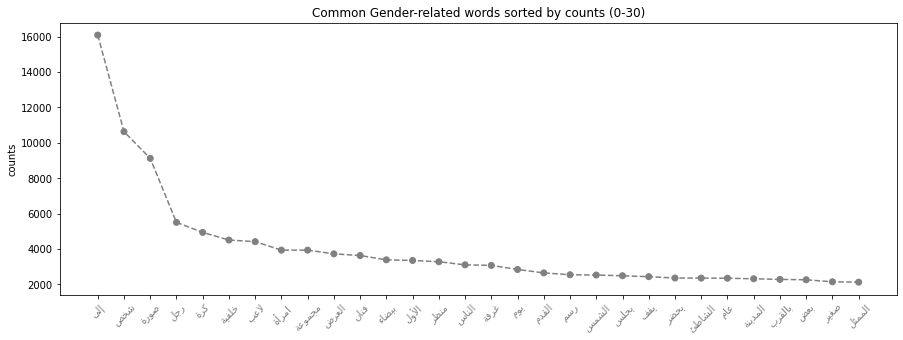

In [482]:
plot_word_distr(offset=0, limit=30)
